In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from my_fyers_model import MyFyersModel

In [2]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
fyers = MyFyersModel()

In [4]:
symbol = 'NSE:NIFTY50-INDEX'
# symbol = 'BSE:SENSEX-INDEX'

In [5]:
data = {
    "symbol": symbol,
    "strikecount" : 5,
    "timestamp": ""
}

In [6]:
response = fyers.get_option_chain(data=data)

In [7]:
# response

In [8]:
response.keys()

dict_keys(['code', 'data', 'message', 's'])

In [9]:
response['data'].keys()

dict_keys(['callOi', 'expiryData', 'indiavixData', 'optionsChain', 'putOi'])

## Indiavix Data

In [10]:
response['data']['indiavixData']

{'ask': 0,
 'bid': 0,
 'description': 'INDIAVIX-INDEX',
 'ex_symbol': 'INDIAVIX',
 'exchange': 'NSE',
 'fyToken': '101000000026017',
 'ltp': 13.85,
 'ltpch': -0.17,
 'ltpchp': -1.21,
 'option_type': '',
 'strike_price': -1,
 'symbol': 'NSE:INDIAVIX-INDEX'}

## Plot Cumulative OI

In [11]:
call_io = response['data']['callOi']
put_io = response['data']['putOi']

In [12]:
call_io

224491875

In [13]:
put_io

225310125

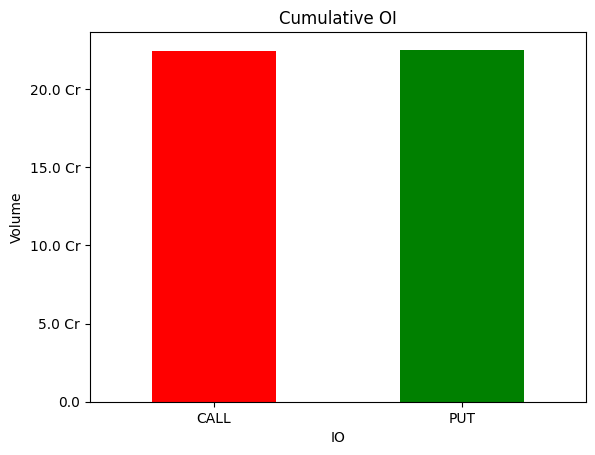

In [14]:
io_df = pd.DataFrame(
    {'IO':['CALL', 'PUT'], 
     'Values':[call_io, put_io]})

# Create a bar chart
io_df.plot(kind='bar', x='IO', y='Values', legend=False, color=['red', 'green'])

# Function to format yticks
def format_lakhs_crores(value, _):
    if value >= 1e7:  # If value is 1 crore or more
        return f'{value / 1e7:.1f} Cr'
    elif value >= 1e5:  # If value is 1 lakh or more
        return f'{value / 1e5:.1f} L'
    return str(value)

# Apply the custom formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_lakhs_crores))

# Customize chart
plt.title("Cumulative OI")
plt.xlabel("IO")
plt.ylabel("Volume")
plt.xticks(rotation=0)
plt.show()

In [15]:
import seaborn as sns

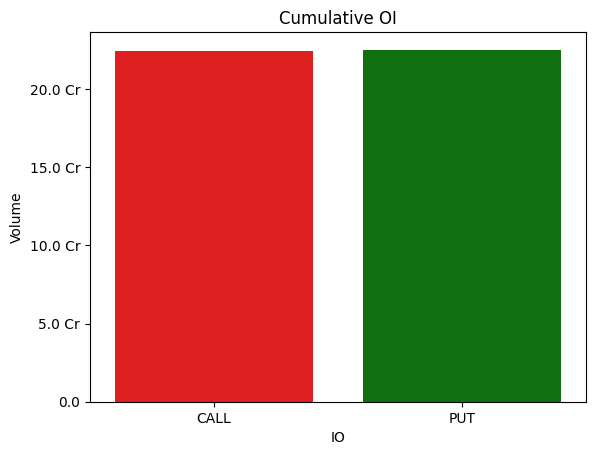

In [16]:
sns.barplot(x='IO',
            y='Values',
            hue='IO',
            data=io_df, palette=['red', 'green'])
 
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_lakhs_crores))

# Customize chart
plt.title("Cumulative OI")
plt.xlabel("IO")
plt.ylabel("Volume")
plt.xticks(rotation=0)
plt.show()

## Get Expiry Dates

In [17]:
expiry_date = response['data']['expiryData']
expiry_date

[{'date': '06-02-2025', 'expiry': '1738836000'},
 {'date': '13-02-2025', 'expiry': '1739440800'},
 {'date': '20-02-2025', 'expiry': '1740045600'},
 {'date': '27-02-2025', 'expiry': '1740650400'},
 {'date': '06-03-2025', 'expiry': '1741255200'},
 {'date': '27-03-2025', 'expiry': '1743069600'},
 {'date': '24-04-2025', 'expiry': '1745488800'},
 {'date': '26-06-2025', 'expiry': '1750932000'},
 {'date': '25-09-2025', 'expiry': '1758794400'},
 {'date': '24-12-2025', 'expiry': '1766570400'},
 {'date': '25-06-2026', 'expiry': '1782381600'},
 {'date': '31-12-2026', 'expiry': '1798711200'},
 {'date': '24-06-2027', 'expiry': '1813831200'},
 {'date': '30-12-2027', 'expiry': '1830160800'},
 {'date': '29-06-2028', 'expiry': '1845885600'},
 {'date': '28-12-2028', 'expiry': '1861610400'},
 {'date': '28-06-2029', 'expiry': '1877335200'},
 {'date': '27-12-2029', 'expiry': '1893060000'}]

In [18]:
expiry_date[0]['date']

'06-02-2025'

## Prepare Option Chain

In [19]:
io_data = pd.DataFrame.from_dict(response['data']['optionsChain'])

In [20]:
io_data.columns

Index(['ask', 'bid', 'description', 'ex_symbol', 'exchange', 'fp', 'fpch',
       'fpchp', 'fyToken', 'ltp', 'ltpch', 'ltpchp', 'option_type',
       'strike_price', 'symbol', 'oi', 'oich', 'oichp', 'prev_oi', 'volume'],
      dtype='object')

In [21]:
io_data.head(10)

,ask,bid,description,ex_symbol,exchange,fp,fpch,fpchp,fyToken,ltp,ltpch,ltpchp,option_type,strike_price,symbol,oi,oich,oichp,prev_oi,volume
0,0.00,0.00,NIFTY50-INDEX,NIFTY,NSE,23833.45,48.05,0.2,101000000026000,23756.75,17.50,0.07,,-1,NSE:NIFTY50-INDEX,NaN,NaN,NaN,NaN,NaN
1,8.95,8.90,NaN,NaN,NaN,NaN,NaN,NaN,101125020644965,8.85,-21.20,-70.55,PE,23500,NSE:NIFTY2520623500PE,16736250.0,6180850.0,58.56,10555400.0,191670750.0
2,240.90,240.40,NaN,NaN,NaN,NaN,NaN,NaN,101125020644961,240.05,8.05,3.47,CE,23500,NSE:NIFTY2520623500CE,4990725.0,-349955.0,-6.55,5340680.0,21164700.0
3,193.90,193.45,NaN,NaN,NaN,NaN,NaN,NaN,101125020644966,193.60,1.55,0.81,CE,23550,NSE:NIFTY2520623550CE,1518225.0,-18455.0,-1.20,1536680.0,12735600.0
4,11.95,11.85,NaN,NaN,NaN,NaN,NaN,NaN,101125020644967,11.90,-27.80,-70.03,PE,23550,NSE:NIFTY2520623550PE,6082725.0,2774325.0,83.86,3308400.0,96929550.0
5,17.75,17.65,NaN,NaN,NaN,NaN,NaN,NaN,101125020644969,17.65,-34.85,-66.38,PE,23600,NSE:NIFTY2520623600PE,12722475.0,6645755.0,109.36,6076720.0,182401425.0
6,149.85,149.50,NaN,NaN,NaN,NaN,NaN,NaN,101125020644968,150.00,-5.00,-3.23,CE,23600,NSE:NIFTY2520623600CE,4904775.0,393375.0,8.72,4511400.0,56199150.0
7,28.30,28.20,NaN,NaN,NaN,NaN,NaN,NaN,101125020644971,28.35,-41.55,-59.44,PE,23650,NSE:NIFTY2520623650PE,6610125.0,3937805.0,147.36,2672320.0,137852025.0
8,110.80,110.50,NaN,NaN,NaN,NaN,NaN,NaN,101125020644970,110.25,-12.05,-9.85,CE,23650,NSE:NIFTY2520623650CE,4071075.0,1883925.0,86.14,2187150.0,57785250.0
9,47.70,47.60,NaN,NaN,NaN,NaN,NaN,NaN,101125020644973,47.90,-44.00,-47.88,PE,23700,NSE:NIFTY2520623700PE,13799025.0,8787745.0,175.36,5011280.0,294478950.0


In [22]:
ce_strike = io_data[io_data['option_type'] == 'CE']
ce_strike.head()

,ask,bid,description,ex_symbol,exchange,fp,fpch,fpchp,fyToken,ltp,ltpch,ltpchp,option_type,strike_price,symbol,oi,oich,oichp,prev_oi,volume
2,240.90,240.40,NaN,NaN,NaN,NaN,NaN,NaN,101125020644961,240.05,8.05,3.47,CE,23500,NSE:NIFTY2520623500CE,4990725.0,-349955.0,-6.55,5340680.0,21164700.0
3,193.90,193.45,NaN,NaN,NaN,NaN,NaN,NaN,101125020644966,193.60,1.55,0.81,CE,23550,NSE:NIFTY2520623550CE,1518225.0,-18455.0,-1.20,1536680.0,12735600.0
6,149.85,149.50,NaN,NaN,NaN,NaN,NaN,NaN,101125020644968,150.00,-5.00,-3.23,CE,23600,NSE:NIFTY2520623600CE,4904775.0,393375.0,8.72,4511400.0,56199150.0
8,110.80,110.50,NaN,NaN,NaN,NaN,NaN,NaN,101125020644970,110.25,-12.05,-9.85,CE,23650,NSE:NIFTY2520623650CE,4071075.0,1883925.0,86.14,2187150.0,57785250.0
10,79.80,79.65,NaN,NaN,NaN,NaN,NaN,NaN,101125020644972,79.55,-14.50,-15.42,CE,23700,NSE:NIFTY2520623700CE,13311750.0,7872000.0,144.71,5439750.0,228568050.0


In [23]:
pe_strike = io_data[io_data['option_type'] == 'PE']
pe_strike.head()

,ask,bid,description,ex_symbol,exchange,fp,fpch,fpchp,fyToken,ltp,ltpch,ltpchp,option_type,strike_price,symbol,oi,oich,oichp,prev_oi,volume
1,8.95,8.90,NaN,NaN,NaN,NaN,NaN,NaN,101125020644965,8.85,-21.20,-70.55,PE,23500,NSE:NIFTY2520623500PE,16736250.0,6180850.0,58.56,10555400.0,191670750.0
4,11.95,11.85,NaN,NaN,NaN,NaN,NaN,NaN,101125020644967,11.90,-27.80,-70.03,PE,23550,NSE:NIFTY2520623550PE,6082725.0,2774325.0,83.86,3308400.0,96929550.0
5,17.75,17.65,NaN,NaN,NaN,NaN,NaN,NaN,101125020644969,17.65,-34.85,-66.38,PE,23600,NSE:NIFTY2520623600PE,12722475.0,6645755.0,109.36,6076720.0,182401425.0
7,28.30,28.20,NaN,NaN,NaN,NaN,NaN,NaN,101125020644971,28.35,-41.55,-59.44,PE,23650,NSE:NIFTY2520623650PE,6610125.0,3937805.0,147.36,2672320.0,137852025.0
9,47.70,47.60,NaN,NaN,NaN,NaN,NaN,NaN,101125020644973,47.90,-44.00,-47.88,PE,23700,NSE:NIFTY2520623700PE,13799025.0,8787745.0,175.36,5011280.0,294478950.0


In [24]:
select_column = ['ltp', 'ltpch', 'ltpchp', 'option_type',  'strike_price', 'symbol', 'oi', 'oich', 'oichp', 'prev_oi', 'volume']

In [25]:
ce_col = ["CE_" + col for col in select_column]
pe_col = ["PE_" + col for col in select_column]

In [26]:
ce_df = ce_strike[['ltp', 'ltpch', 'ltpchp', 'option_type',  'strike_price', 'symbol', 'oi', 'oich', 'oichp', 'prev_oi', 'volume']].copy()
ce_df.columns = ce_col
ce_df.set_index('CE_strike_price', inplace=True)
ce_df.head()

,CE_ltp,CE_ltpch,CE_ltpchp,CE_option_type,CE_symbol,CE_oi,CE_oich,CE_oichp,CE_prev_oi,CE_volume
CE_strike_price,,,,,,,,,,
23500,240.05,8.05,3.47,CE,NSE:NIFTY2520623500CE,4990725.0,-349955.0,-6.55,5340680.0,21164700.0
23550,193.60,1.55,0.81,CE,NSE:NIFTY2520623550CE,1518225.0,-18455.0,-1.20,1536680.0,12735600.0
23600,150.00,-5.00,-3.23,CE,NSE:NIFTY2520623600CE,4904775.0,393375.0,8.72,4511400.0,56199150.0
23650,110.25,-12.05,-9.85,CE,NSE:NIFTY2520623650CE,4071075.0,1883925.0,86.14,2187150.0,57785250.0
23700,79.55,-14.50,-15.42,CE,NSE:NIFTY2520623700CE,13311750.0,7872000.0,144.71,5439750.0,228568050.0


In [27]:
pe_df = pe_strike[['ltp', 'ltpch', 'ltpchp', 'option_type', 'strike_price', 'symbol', 'oi', 'oich', 'oichp', 'prev_oi', 'volume']].copy()
pe_df.columns = pe_col
pe_df.set_index('PE_strike_price', inplace=True)
pe_df.head()

,PE_ltp,PE_ltpch,PE_ltpchp,PE_option_type,PE_symbol,PE_oi,PE_oich,PE_oichp,PE_prev_oi,PE_volume
PE_strike_price,,,,,,,,,,
23500,8.85,-21.20,-70.55,PE,NSE:NIFTY2520623500PE,16736250.0,6180850.0,58.56,10555400.0,191670750.0
23550,11.90,-27.80,-70.03,PE,NSE:NIFTY2520623550PE,6082725.0,2774325.0,83.86,3308400.0,96929550.0
23600,17.65,-34.85,-66.38,PE,NSE:NIFTY2520623600PE,12722475.0,6645755.0,109.36,6076720.0,182401425.0
23650,28.35,-41.55,-59.44,PE,NSE:NIFTY2520623650PE,6610125.0,3937805.0,147.36,2672320.0,137852025.0
23700,47.90,-44.00,-47.88,PE,NSE:NIFTY2520623700PE,13799025.0,8787745.0,175.36,5011280.0,294478950.0


In [28]:
df = pd.concat([ce_df, pe_df], axis=1)

In [29]:
df.head()

,CE_ltp,CE_ltpch,CE_ltpchp,CE_option_type,CE_symbol,CE_oi,CE_oich,CE_oichp,CE_prev_oi,CE_volume,PE_ltp,PE_ltpch,PE_ltpchp,PE_option_type,PE_symbol,PE_oi,PE_oich,PE_oichp,PE_prev_oi,PE_volume
23500,240.05,8.05,3.47,CE,NSE:NIFTY2520623500CE,4990725.0,-349955.0,-6.55,5340680.0,21164700.0,8.85,-21.20,-70.55,PE,NSE:NIFTY2520623500PE,16736250.0,6180850.0,58.56,10555400.0,191670750.0
23550,193.60,1.55,0.81,CE,NSE:NIFTY2520623550CE,1518225.0,-18455.0,-1.20,1536680.0,12735600.0,11.90,-27.80,-70.03,PE,NSE:NIFTY2520623550PE,6082725.0,2774325.0,83.86,3308400.0,96929550.0
23600,150.00,-5.00,-3.23,CE,NSE:NIFTY2520623600CE,4904775.0,393375.0,8.72,4511400.0,56199150.0,17.65,-34.85,-66.38,PE,NSE:NIFTY2520623600PE,12722475.0,6645755.0,109.36,6076720.0,182401425.0
23650,110.25,-12.05,-9.85,CE,NSE:NIFTY2520623650CE,4071075.0,1883925.0,86.14,2187150.0,57785250.0,28.35,-41.55,-59.44,PE,NSE:NIFTY2520623650PE,6610125.0,3937805.0,147.36,2672320.0,137852025.0
23700,79.55,-14.50,-15.42,CE,NSE:NIFTY2520623700CE,13311750.0,7872000.0,144.71,5439750.0,228568050.0,47.90,-44.00,-47.88,PE,NSE:NIFTY2520623700PE,13799025.0,8787745.0,175.36,5011280.0,294478950.0


In [30]:
df.columns

Index(['CE_ltp', 'CE_ltpch', 'CE_ltpchp', 'CE_option_type', 'CE_symbol',
       'CE_oi', 'CE_oich', 'CE_oichp', 'CE_prev_oi', 'CE_volume', 'PE_ltp',
       'PE_ltpch', 'PE_ltpchp', 'PE_option_type', 'PE_symbol', 'PE_oi',
       'PE_oich', 'PE_oichp', 'PE_prev_oi', 'PE_volume'],
      dtype='object')

## Copy df

In [31]:
tf = df.copy()

In [32]:
tf.reset_index(names='STRIKE_PRICE', inplace=True)

In [33]:
tf.columns

Index(['STRIKE_PRICE', 'CE_ltp', 'CE_ltpch', 'CE_ltpchp', 'CE_option_type',
       'CE_symbol', 'CE_oi', 'CE_oich', 'CE_oichp', 'CE_prev_oi', 'CE_volume',
       'PE_ltp', 'PE_ltpch', 'PE_ltpchp', 'PE_option_type', 'PE_symbol',
       'PE_oi', 'PE_oich', 'PE_oichp', 'PE_prev_oi', 'PE_volume'],
      dtype='object')

In [34]:
tf = tf[['CE_ltp', 'CE_ltpch', 'CE_ltpchp', 'CE_option_type',
       'CE_symbol', 'CE_oi', 'CE_oich', 'CE_oichp', 'CE_prev_oi', 'CE_volume', 'STRIKE_PRICE',
       'PE_ltp', 'PE_ltpch', 'PE_ltpchp', 'PE_option_type', 'PE_symbol',
       'PE_oi', 'PE_oich', 'PE_oichp', 'PE_prev_oi', 'PE_volume']]

In [35]:
tf

,CE_ltp,CE_ltpch,CE_ltpchp,CE_option_type,CE_symbol,CE_oi,CE_oich,CE_oichp,CE_prev_oi,CE_volume,STRIKE_PRICE,PE_ltp,PE_ltpch,PE_ltpchp,PE_option_type,PE_symbol,PE_oi,PE_oich,PE_oichp,PE_prev_oi,PE_volume
0,240.05,8.05,3.47,CE,NSE:NIFTY2520623500CE,4990725.0,-349955.0,-6.55,5340680.0,21164700.0,23500,8.85,-21.20,-70.55,PE,NSE:NIFTY2520623500PE,16736250.0,6180850.0,58.56,10555400.0,191670750.0
1,193.60,1.55,0.81,CE,NSE:NIFTY2520623550CE,1518225.0,-18455.0,-1.20,1536680.0,12735600.0,23550,11.90,-27.80,-70.03,PE,NSE:NIFTY2520623550PE,6082725.0,2774325.0,83.86,3308400.0,96929550.0
2,150.00,-5.00,-3.23,CE,NSE:NIFTY2520623600CE,4904775.0,393375.0,8.72,4511400.0,56199150.0,23600,17.65,-34.85,-66.38,PE,NSE:NIFTY2520623600PE,12722475.0,6645755.0,109.36,6076720.0,182401425.0
3,110.25,-12.05,-9.85,CE,NSE:NIFTY2520623650CE,4071075.0,1883925.0,86.14,2187150.0,57785250.0,23650,28.35,-41.55,-59.44,PE,NSE:NIFTY2520623650PE,6610125.0,3937805.0,147.36,2672320.0,137852025.0
4,79.55,-14.50,-15.42,CE,NSE:NIFTY2520623700CE,13311750.0,7872000.0,144.71,5439750.0,228568050.0,23700,47.90,-44.00,-47.88,PE,NSE:NIFTY2520623700PE,13799025.0,8787745.0,175.36,5011280.0,294478950.0
5,58.75,-11.90,-16.84,CE,NSE:NIFTY2520623750CE,11712600.0,9210980.0,368.20,2501620.0,271945575.0,23750,77.15,-41.20,-34.81,PE,NSE:NIFTY2520623750PE,8050725.0,6696445.0,494.47,1354280.0,219836100.0
6,44.65,-7.00,-13.55,CE,NSE:NIFTY2520623800CE,16675350.0,9441370.0,130.51,7233980.0,304212750.0,23800,112.50,-36.25,-24.37,PE,NSE:NIFTY2520623800PE,5498475.0,3905695.0,245.21,1592780.0,163106325.0
7,32.75,-3.70,-10.15,CE,NSE:NIFTY2520623850CE,6703875.0,4310625.0,180.12,2393250.0,127063950.0,23850,151.40,-32.50,-17.67,PE,NSE:NIFTY2520623850PE,1482150.0,1104000.0,291.95,378150.0,36037725.0
8,23.95,-1.80,-6.99,CE,NSE:NIFTY2520623900CE,10351650.0,5542500.0,115.25,4809150.0,146417850.0,23900,191.85,-31.35,-14.05,PE,NSE:NIFTY2520623900PE,1091625.0,790425.0,262.43,301200.0,27197175.0
9,17.20,-1.10,-6.01,CE,NSE:NIFTY2520623950CE,4616550.0,2424450.0,110.60,2192100.0,83533575.0,23950,235.40,-31.05,-11.65,PE,NSE:NIFTY2520623950PE,186600.0,126825.0,212.17,59775.0,4856400.0


In [36]:
tf[tf['CE_ltp'] >= 20]

,CE_ltp,CE_ltpch,CE_ltpchp,CE_option_type,CE_symbol,CE_oi,CE_oich,CE_oichp,CE_prev_oi,CE_volume,STRIKE_PRICE,PE_ltp,PE_ltpch,PE_ltpchp,PE_option_type,PE_symbol,PE_oi,PE_oich,PE_oichp,PE_prev_oi,PE_volume
0,240.05,8.05,3.47,CE,NSE:NIFTY2520623500CE,4990725.0,-349955.0,-6.55,5340680.0,21164700.0,23500,8.85,-21.20,-70.55,PE,NSE:NIFTY2520623500PE,16736250.0,6180850.0,58.56,10555400.0,191670750.0
1,193.60,1.55,0.81,CE,NSE:NIFTY2520623550CE,1518225.0,-18455.0,-1.20,1536680.0,12735600.0,23550,11.90,-27.80,-70.03,PE,NSE:NIFTY2520623550PE,6082725.0,2774325.0,83.86,3308400.0,96929550.0
2,150.00,-5.00,-3.23,CE,NSE:NIFTY2520623600CE,4904775.0,393375.0,8.72,4511400.0,56199150.0,23600,17.65,-34.85,-66.38,PE,NSE:NIFTY2520623600PE,12722475.0,6645755.0,109.36,6076720.0,182401425.0
3,110.25,-12.05,-9.85,CE,NSE:NIFTY2520623650CE,4071075.0,1883925.0,86.14,2187150.0,57785250.0,23650,28.35,-41.55,-59.44,PE,NSE:NIFTY2520623650PE,6610125.0,3937805.0,147.36,2672320.0,137852025.0
4,79.55,-14.50,-15.42,CE,NSE:NIFTY2520623700CE,13311750.0,7872000.0,144.71,5439750.0,228568050.0,23700,47.90,-44.00,-47.88,PE,NSE:NIFTY2520623700PE,13799025.0,8787745.0,175.36,5011280.0,294478950.0
5,58.75,-11.90,-16.84,CE,NSE:NIFTY2520623750CE,11712600.0,9210980.0,368.20,2501620.0,271945575.0,23750,77.15,-41.20,-34.81,PE,NSE:NIFTY2520623750PE,8050725.0,6696445.0,494.47,1354280.0,219836100.0
6,44.65,-7.00,-13.55,CE,NSE:NIFTY2520623800CE,16675350.0,9441370.0,130.51,7233980.0,304212750.0,23800,112.50,-36.25,-24.37,PE,NSE:NIFTY2520623800PE,5498475.0,3905695.0,245.21,1592780.0,163106325.0
7,32.75,-3.70,-10.15,CE,NSE:NIFTY2520623850CE,6703875.0,4310625.0,180.12,2393250.0,127063950.0,23850,151.40,-32.50,-17.67,PE,NSE:NIFTY2520623850PE,1482150.0,1104000.0,291.95,378150.0,36037725.0
8,23.95,-1.80,-6.99,CE,NSE:NIFTY2520623900CE,10351650.0,5542500.0,115.25,4809150.0,146417850.0,23900,191.85,-31.35,-14.05,PE,NSE:NIFTY2520623900PE,1091625.0,790425.0,262.43,301200.0,27197175.0


In [37]:
tf[tf['CE_ltp'] <= 25]

,CE_ltp,CE_ltpch,CE_ltpchp,CE_option_type,CE_symbol,CE_oi,CE_oich,CE_oichp,CE_prev_oi,CE_volume,STRIKE_PRICE,PE_ltp,PE_ltpch,PE_ltpchp,PE_option_type,PE_symbol,PE_oi,PE_oich,PE_oichp,PE_prev_oi,PE_volume
8,23.95,-1.8,-6.99,CE,NSE:NIFTY2520623900CE,10351650.0,5542500.0,115.25,4809150.0,146417850.0,23900,191.85,-31.35,-14.05,PE,NSE:NIFTY2520623900PE,1091625.0,790425.0,262.43,301200.0,27197175.0
9,17.20,-1.1,-6.01,CE,NSE:NIFTY2520623950CE,4616550.0,2424450.0,110.60,2192100.0,83533575.0,23950,235.40,-31.05,-11.65,PE,NSE:NIFTY2520623950PE,186600.0,126825.0,212.17,59775.0,4856400.0
10,12.15,-0.8,-6.18,CE,NSE:NIFTY2520624000CE,19533000.0,4259300.0,27.89,15273700.0,189688800.0,24000,280.00,-31.14,-10.01,PE,NSE:NIFTY2520624000PE,845550.0,150150.0,21.59,695400.0,10692525.0


In [38]:
# tf.to_csv('nifty_oc.csv', index=None)
# tf.to_csv('sensex_oc.csv', index=None)

# 9/20 EMA Crossover Strategy

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_39244/604009667.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][9:] = np.where(data['EMA_9'][9:] > data['EMA_20'][9:], 1, 0)  # Buy signal


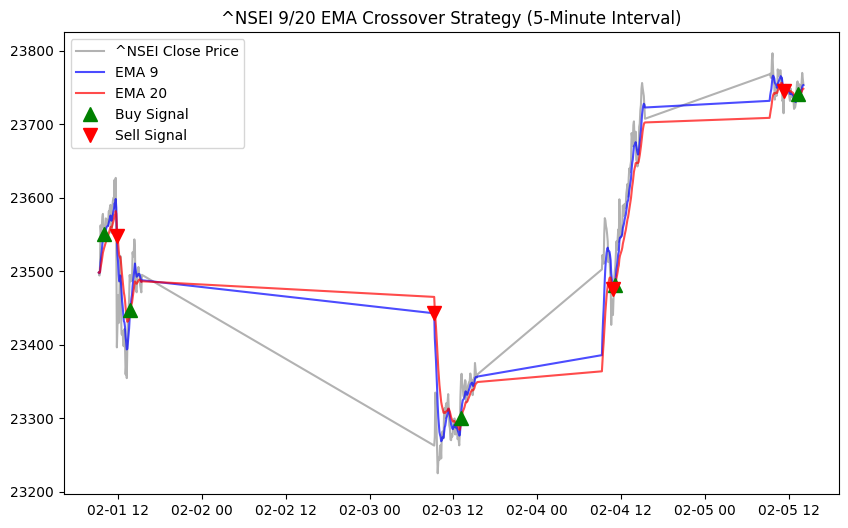

In [40]:
# Required Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch 5-minute historical stock data
ticker = "^NSEI"  # Example: Apple Inc.
start_date = "2025-02-01"
end_date = "2025-02-15"

# Fetch data for 5-minute intervals
data = yf.download(ticker, start=start_date, end=end_date, interval="5m")

# Calculate EMAs (9-period and 20-period)
data['EMA_9'] = data['Close'].ewm(span=9, adjust=False).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# Generate Buy/Sell signals
data['Signal'] = 0
data['Signal'][9:] = np.where(data['EMA_9'][9:] > data['EMA_20'][9:], 1, 0)  # Buy signal
data['Position'] = data['Signal'].diff()

# Plotting the data and signals
plt.figure(figsize=(10,6))

# Plot the closing price and EMAs
plt.plot(data['Close'], label=f'{ticker} Close Price', color='black', alpha=0.3)
plt.plot(data['EMA_9'], label='EMA 9', color='blue', alpha=0.7)
plt.plot(data['EMA_20'], label='EMA 20', color='red', alpha=0.7)

# Plot Buy signals (green arrows) and Sell signals (red arrows)
plt.plot(data[data['Position'] == 1].index, data['EMA_9'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

plt.plot(data[data['Position'] == -1].index, data['EMA_9'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{ticker} 9/20 EMA Crossover Strategy (5-Minute Interval)')
plt.legend(loc='best')
# plt.show()

# Display the last few signals
signals = data[['Close', 'EMA_9', 'EMA_20', 'Position']].dropna()